## **IMPORTING LIBRARIES**

### ***BASIC LIBRARIES***

In [6]:
# FOR READING / MANIPULATING DATAFRAMES
import pandas as pd
# FOR READING / MANIPULATING MATRICES
import numpy as np
# FOR CONTROLLING PLOTTING FEATURES DURING VISUALISATION
import matplotlib.pyplot as plt
# FOR PLOTTING AND VISUALISATION
import seaborn as sns

### ***MACHINE LEARNING LIBRARIES***

In [7]:
# FOR SPLITTING DATA
from sklearn.model_selection import train_test_split

# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
# DECISION TREE
from sklearn.tree import DecisionTreeClassifier
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
# K-NEAREST-NEIGHBORS
from sklearn.neighbors import KNeighborsClassifier
# SVM
from sklearn.svm import SVC

# FOR SCALING DATA BEFORE TRAINING
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# FOR HYPER-PARAMETER-TUNING
from sklearn.model_selection import GridSearchCV

# FOR FINAL REPORT
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.math import confusion_matrix

## **IMPORTING DATA**

### ***READING CSV's***

In [8]:
# READING FILES
data30 = pd.read_csv('Data/features_30_sec.csv')
data3 = pd.read_csv('Data/features_3_sec.csv')

# REMOVING CORRUPT FILE (FOUND WHILE TESTING)
data30 = data30[data30['filename'] != 'jazz.00054.wav']

### ***PRINTING THE DATA***

In [9]:
data30

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00095.wav,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,...,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665,rock
996,rock.00096.wav,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,...,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624,rock
997,rock.00097.wav,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,...,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515,rock
998,rock.00098.wav,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,...,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088,rock


## **PROCESSING DATA**

### ***PROCESSING AND STORING WAVEFORMS***

In [10]:
import librosa
waveforms = []

for i, j in data30.iterrows():
    path = (os.path.join('Data', 'genres_original', j.label, j.filename))
    waveform = librosa.load(path, res_type = 'kaiser_fast')
    waveforms.append(waveform)

### ***MFCC_FEATURE_MAPS FOR AUDIO***

In [11]:
finalised_data = []

for audio, sample_rate in waveforms:
    features = librosa.feature.mfcc(y=audio, sr = sample_rate, n_mfcc= 30)
    averaged_features = np.mean(features, axis=1)
    finalised_data.append(np.array(averaged_features))

finalised_data = np.array(finalised_data)

### *FUNCTION FOR PLOTTING THE SOUND-WAVE VISUALLY (EXTRAS)*

In [12]:
def sound_plotter(filename, range_start=0, range_end=1000):
    sample = librosa.load(filename, res_type = 'kaiser_fast')[0][range_start:range_end]
    plt.figure(figsize=(25, 4))
    plt.title(filename)
    for i in range(range_end-range_start):
        sns.lineplot(x = [i, i], y = [0, sample[i]], linewidth = 2, color = 'blue', estimator = None)
    sns.lineplot(x=[0, range_end-range_start], y=[0, 0], color = 'red')
    plt.show()

### *FUNCTION FOR SHOWING MFCC FEATURES VISUALLY (EXTRAS)*

In [13]:
def mfcc_plotter(filename):
    waveform = librosa.load(filename, res_type = 'kaiser_fast')
    audio, sample_rate = waveform
    feature_map = librosa.feature.mfcc(y = audio, sr = sample_rate, n_mfcc= 30)
    plt.figure(figsize = (20, 7))
    plt.title('Featurxe map')
    sns.heatmap(feature_map, cmap = 'Greys_r')
    plt.show()

### *TESTING THE FUNCTIONS*

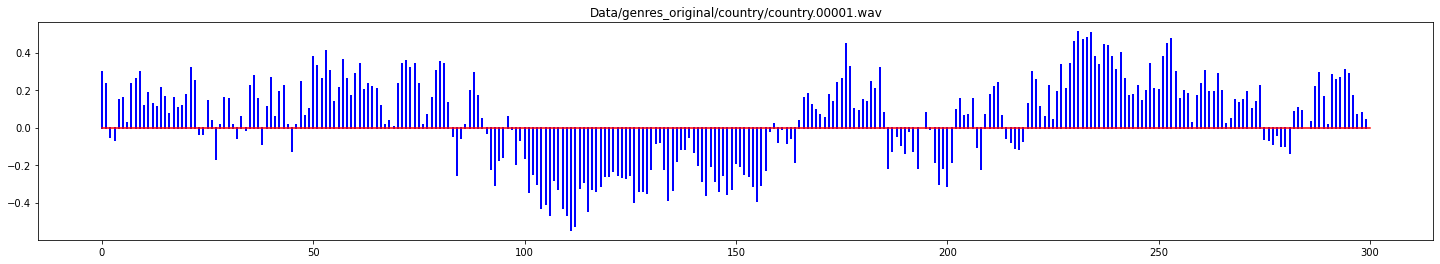

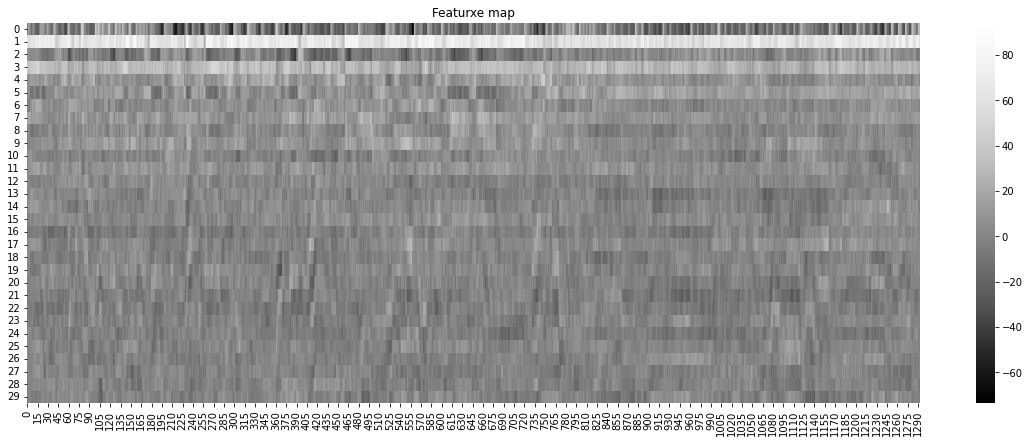

In [14]:
sound_plotter('Data/genres_original/country/country.00001.wav', 0, 300)
mfcc_plotter('Data/genres_original/country/country.00001.wav')

## **TRAINING MODEL**

### ***SPLITTING DATA (INTO TRAINING AND TESTING DATA)***

In [15]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

X = finalised_data
Y = np.array(data30['label'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.35, random_state=90, stratify=Y)


labelencoder = LabelEncoder()
labels = data30['label'].unique()
Y_train_hotencoded = to_categorical(labelencoder.fit_transform(Y_train))
Y_test_hotencoded = to_categorical(labelencoder.fit_transform(Y_test))


### ***MAKING LIST OF MODELS AND HYPER-PARAMETERS***

In [16]:
models = {
    'LogisticRegression': LogisticRegression(max_iter = 1000),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'KNN_Classifier': KNeighborsClassifier(),
    'SVM_Classifier': SVC()
}

hyper_params = {
    'LogisticRegression': {
        'C': [1, 10, 100, 100000],
        'penalty': ['l2', 'none'],
        'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
    },
    'DecisionTree': {
        'max_depth': [None, 5, 10, 20, 40],
        'max_features': [None, 'sqrt', 'log2'],
    },
    'RandomForest': {
        'n_estimators': [25, 50, 75, 100],
        'max_depth': [None, 5, 10, 20, 40],
        'max_features': [None, 'sqrt', 'log2'],
    },
    'KNN_Classifier': {
        'n_neighbors': [5, 10, 15],
        'weights': ['uniform', 'distance'],
        'algorithm': ['ball_tree', 'kd_tree', 'brute'],
        'metric': ['minkowski', 'manhattan', 'euclidean']
    },
    'SVM_Classifier': {
        'degree': [2, 3, 4],
        'C': [1, 10, 100, 100000],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto']
    }
}

### ***CHECKING WHICH KIND OF SCALING WORKS BETTER***

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

scaler1 = MinMaxScaler()
scaler2 = StandardScaler()
scaler1.fit(X_train)
scaler2.fit(X_train)

mm_X_train = scaler1.transform(X_train)
mm_X_test = scaler1.transform(X_test)

ss_X_train = scaler2.transform(X_train)
ss_X_test = scaler2.transform(X_test)

for i in models:
    current_model = models[i]
    current_model.fit(mm_X_train, Y_train)
    minmax_accuracy = round(accuracy_score(current_model.predict(mm_X_test), Y_test)*100, 2)
    print('Accuracy of {} with MinMax Scaling: {}%'.format(i, minmax_accuracy))
    current_model = models[i]
    current_model.fit(ss_X_train, Y_train)
    standard_accuracy = round(accuracy_score(current_model.predict(ss_X_test), Y_test)*100, 2)
    print('Accuracy of {} with Standard Scaling: {}%'.format(i, standard_accuracy))
    if(standard_accuracy > minmax_accuracy):
        print('Standard scaling works better by {}%'.format(round(standard_accuracy - minmax_accuracy, 2)))
    else:
        print('Min-max scaling works better by {}%'.format(round(minmax_accuracy - standard_accuracy, 2)))
    print()

Accuracy of LogisticRegression with MinMax Scaling: 50.29%
Accuracy of LogisticRegression with Standard Scaling: 54.86%
Standard scaling works better by 4.57%

Accuracy of DecisionTree with MinMax Scaling: 43.14%
Accuracy of DecisionTree with Standard Scaling: 43.43%
Standard scaling works better by 0.29%

Accuracy of RandomForest with MinMax Scaling: 57.43%
Accuracy of RandomForest with Standard Scaling: 58.29%
Standard scaling works better by 0.86%

Accuracy of KNN_Classifier with MinMax Scaling: 57.43%
Accuracy of KNN_Classifier with Standard Scaling: 56.86%
Min-max scaling works better by 0.57%

Accuracy of SVM_Classifier with MinMax Scaling: 58.86%
Accuracy of SVM_Classifier with Standard Scaling: 62.29%
Standard scaling works better by 3.43%



WE CHOOSE MINMAX_SCALING BECAUSE THE SUM OF ACCURACY DIFFERENCE MARGINS FAVOURS MINMAX_SCALING

### ***HYPERPARAMETER TUNING***

In [18]:
best_params = []
accuracies = []

for i in models:
    model = GridSearchCV(models[i], hyper_params[i], cv = 5, scoring = 'accuracy')
    model.fit(np.append(mm_X_train, mm_X_test, axis=0), np.append(Y_train, Y_test, axis=0))
    best_params.append(model.best_params_)
    accuracies.append(model.best_score_)    

In [19]:
for i in range(len(best_params)):
    print(list(models.keys())[i])
    print('\tBest parameters:', best_params[i])
    print('\tAccuracy:', round(accuracies[i]*100, 2))
    print()

LogisticRegression
	Best parameters: {'C': 1, 'penalty': 'none', 'solver': 'saga'}
	Accuracy: 57.65

DecisionTree
	Best parameters: {'max_depth': 20, 'max_features': None}
	Accuracy: 40.94

RandomForest
	Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 100}
	Accuracy: 63.36

KNN_Classifier
	Best parameters: {'algorithm': 'ball_tree', 'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}
	Accuracy: 61.65

SVM_Classifier
	Best parameters: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
	Accuracy: 65.86



### TRAINING AN **A**RTIFICIAL-**N**EURAL-**N**ETWORK

In [26]:
import tensorflow as tf

ann_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2000, input_shape = (30,), activation = 'relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1000, activation = 'relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(500, activation = 'relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(250, activation = 'relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(125, activation = 'relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(60, activation = 'relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(30, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

ann_model.compile(optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

History = ann_model.fit(mm_X_train, Y_train_hotencoded, epochs = 1000, validation_data=(mm_X_test, Y_test_hotencoded))

Y_predictions = ann_model.predict(mm_X_test)

observations = [labels[np.argmax(i)] for i in Y_predictions]
accuracy_score(Y_test, observations)

Epoch 1/1000
21/21 [==============================] - 2s 50ms/step - loss: 2.3033 - accuracy: 0.1109 - val_loss: 2.2471 - val_accuracy: 0.1371
Epoch 2/1000
21/21 [==============================] - 1s 49ms/step - loss: 2.1900 - accuracy: 0.1757 - val_loss: 2.0892 - val_accuracy: 0.1971
Epoch 3/1000
21/21 [==============================] - 1s 43ms/step - loss: 2.0675 - accuracy: 0.2065 - val_loss: 1.9624 - val_accuracy: 0.2600
Epoch 4/1000
21/21 [==============================] - 1s 46ms/step - loss: 2.0277 - accuracy: 0.2465 - val_loss: 1.9113 - val_accuracy: 0.3286
Epoch 5/1000
21/21 [==============================] - 1s 45ms/step - loss: 1.8568 - accuracy: 0.3082 - val_loss: 1.8855 - val_accuracy: 0.2829
Epoch 6/1000
21/21 [==============================] - 1s 47ms/step - loss: 1.8133 - accuracy: 0.2928 - val_loss: 1.6686 - val_accuracy: 0.3800
Epoch 7/1000
21/21 [==============================] - 1s 49ms/step - loss: 1.7396 - accuracy: 0.3482 - val_loss: 1.7653 - val_accuracy: 0.3343

0.5542857142857143

### ***CHECKING ACCURACY OF TESTING AND TRAINING DATA THROUGHOUT THE EPOCHS***

In [29]:
training_accuracy = History.history['accuracy']
training_loss = History.history['loss']

validation_accuracy = History.history['val_accuracy']
validation_loss = History.history['val_loss']

### ACCURACY COMPARISION

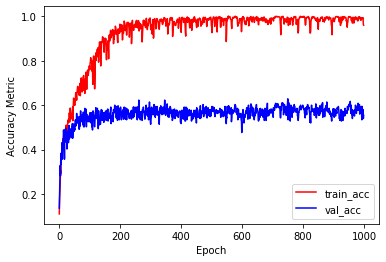

In [30]:
epochs = range(1000)
plt.plot(epochs, training_accuracy, color='r', label='train_acc')
plt.plot(epochs, validation_accuracy, color='b', label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Metric')
plt.legend()
plt.show()

### LOSS COMPARISION

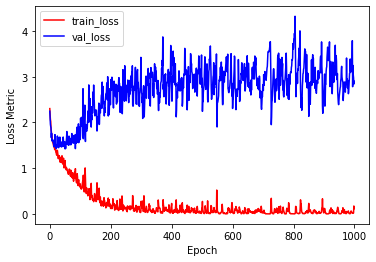

In [35]:
plt.plot(epochs, training_loss, color='r', label='train_loss')
plt.plot(epochs, validation_loss, color='b', label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Metric')
plt.legend()
plt.show()

AS AMONG ALL THE MODELS (ANN INCLUDED), THE BEST ONE THAT WORKED WAS SVM, WE SHALL EXPORT THAT AND MAKE A SCRIPT TO IMPORT THE MODEL AND CLASSIFY AN AUDIO FILE

### ***EXPORTING***

In [37]:
import pickle

model_file = open('music_classifier', 'ab')
scaler_file = open('minmax_scaler', 'ab')
      
pickle.dump(models['SVM_Classifier'], model_file)
pickle.dump(scaler1, scaler_file)
model_file.close()

### ***FUNCTION TO READ AND CLASSIFY A FILE***

In [48]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
import librosa

scaler_file = open('minmax_scaler', 'rb')     
scaler = pickle.load(scaler_file)

predictor_file = open('music_classifier', 'rb')
predictor = pickle.load(predictor_file)

def music_classification(filepath):
    wave = librosa.load(filepath)
    features = librosa.feature.mfcc(y = wave[0], sr = wave[1], n_mfcc=30)
    features_mean = np.array([np.sum(features, axis=1)])
    features_scaled = scaler.transform(features_mean)
    print(predictor.predict(features_scaled))